In [ ]:
String2 = "    this is a pandas class.     "
print("Original: /"+String2+"/")
str1 = String2.strip()
print("Strip Method: /"+str1+"/")
str2 = String2.lstrip()
print("lStrip Method: /"+str2+"/")

str3 = String2.rstrip()
print("rStrip Method: /"+str3+"/")

Original: /    this is a pandas class.     /
Strip Method: /this is a pandas class./
lStrip Method: /this is a pandas class.     /
rStrip Method: /    this is a pandas class./


In [ ]:
import pandas as pd

# Sample DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'],
    'Department': ['HR', 'Financea', 'Marketing', 'IT', 'Operations']
}
df = pd.DataFrame(data)
df

,Name,City,Department
0,Alice,New York,HR
1,Bob,Los Angeles,Financea
2,Charlie,Chicago,Marketing
3,David,Houston,IT
4,Eva,Phoenix,Operations


In [ ]:
# Add extra whitespace for demonstration
df['Name_whitespace'] = ['  Alice  ', '  Bob', 'Charlie  ', '  David', 'Eva  ']

# Remove leading and trailing whitespace
df['Name_strip'] = df['Name_whitespace'].str.strip()
# Remove leading whitespace
df['Name_lstrip'] = df['Name_whitespace'].str.lstrip()
# Remove trailing whitespace
df['Name_rstrip'] = df['Name_whitespace'].str.rstrip()
df[['Name_whitespace','Name_strip','Name_lstrip','Name_rstrip'] ]

,Name_whitespace,Name_strip,Name_lstrip,Name_rstrip
0,Alice,Alice,Alice,Alice
1,Bob,Bob,Bob,Bob
2,Charlie,Charlie,Charlie,Charlie
3,David,David,David,David
4,Eva,Eva,Eva,Eva


In [ ]:
df['Dept_findall_a'] = df['Department'].str.findall('a')


In [ ]:
df[["Department", "Dept_findall_a"]]

,Department,Dept_findall_a
0,HR,[]
1,Financea,"[a, a]"
2,Marketing,[a]
3,IT,[]
4,Operations,[a]


In [ ]:
df

,Name,City,Department
0,Alice,New York,HR
1,Bob,Los Angeles,Financea
2,Charlie,Chicago,Marketing
3,David,Houston,IT
4,Eva,Phoenix,Operations


In [ ]:
df["NEW"]= df["Name"].str.cat(df["City"], "==>")

In [ ]:
df

,Name,City,Department,NEW
0,Alice,New York,HR,Alice==>New York
1,Bob,Los Angeles,Financea,Bob==>Los Angeles
2,Charlie,Chicago,Marketing,Charlie==>Chicago
3,David,Houston,IT,David==>Houston
4,Eva,Phoenix,Operations,Eva==>Phoenix


In [ ]:
df['Name'].str.get(1)

,Name
0,l
1,o
2,h
3,a
4,v


In [ ]:

data1 = {
    'ID': [1, 2, 3, 4],
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [24, 27, 22, 32],
    'dfl' : ['left','left','left','left']
}

df1 = pd.DataFrame(data1)

data2 = {
    'ID': [3, 4, 5, 6],
    'Name': ['Charlie', 'David', 'Eve', 'Frank'],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston'],
    'dfr'  : ['right', 'right', 'right', 'right']
}

df2 = pd.DataFrame(data2)

print("DataFrame 1:")
display(df1)

print("DataFrame 2:")
display(df2)


DataFrame 1:


,ID,Name,Age,dfl
0,1,Alice,24,left
1,2,Bob,27,left
2,3,Charlie,22,left
3,4,David,32,left


DataFrame 2:


,ID,Name,City,dfr
0,3,Charlie,New York,right
1,4,David,Los Angeles,right
2,5,Eve,Chicago,right
3,6,Frank,Houston,right


In [ ]:
df1.merge(df2)

,ID,Name,Age,dfl,City,dfr
0,3,Charlie,22,left,New York,right
1,4,David,32,left,Los Angeles,right


In [ ]:
df1.merge(df2, how="inner")

,ID,Name,Age,dfl,City,dfr
0,3,Charlie,22,left,New York,right
1,4,David,32,left,Los Angeles,right


In [ ]:
df1.merge(df2, how="inner", on="ID")

,ID,Name_x,Age,dfl,Name_y,City,dfr
0,3,Charlie,22,left,Charlie,New York,right
1,4,David,32,left,David,Los Angeles,right


In [ ]:
df1.merge(df2, how="inner", on=["ID","Name"])

,ID,Name,Age,dfl,City,dfr
0,3,Charlie,22,left,New York,right
1,4,David,32,left,Los Angeles,right


In [ ]:
df1.merge(df2, how="outer")

,ID,Name,Age,dfl,City,dfr
0,1,Alice,24.0,left,NaN,NaN
1,2,Bob,27.0,left,NaN,NaN
2,3,Charlie,22.0,left,New York,right
3,4,David,32.0,left,Los Angeles,right
4,5,Eve,NaN,NaN,Chicago,right
5,6,Frank,NaN,NaN,Houston,right


In [ ]:
df1.merge(df2, how='left')

,ID,Name,Age,dfl,City,dfr
0,1,Alice,24,left,NaN,NaN
1,2,Bob,27,left,NaN,NaN
2,3,Charlie,22,left,New York,right
3,4,David,32,left,Los Angeles,right


In [ ]:
df1

,ID,Name,Age,dfl
0,1,Alice,24,left
1,2,Bob,27,left
2,3,Charlie,22,left
3,4,David,32,left


In [ ]:
df2

,ID,Name,City,dfr
0,3,Charlie,New York,right
1,4,David,Los Angeles,right
2,5,Eve,Chicago,right
3,6,Frank,Houston,right


In [ ]:
df1.merge(df2, how="right")

,ID,Name,Age,dfl,City,dfr
0,3,Charlie,22.0,left,New York,right
1,4,David,32.0,left,Los Angeles,right
2,5,Eve,NaN,NaN,Chicago,right
3,6,Frank,NaN,NaN,Houston,right


In [ ]:
df1.join(df2, on="ID", how="outer", rsuffix="_right", lsuffix="_left")

,ID,ID_left,Name_left,Age,dfl,ID_right,Name_right,City,dfr
NaN,0,NaN,NaN,NaN,NaN,3.0,Charlie,New York,right
0.0,1,1.0,Alice,24.0,left,4.0,David,Los Angeles,right
1.0,2,2.0,Bob,27.0,left,5.0,Eve,Chicago,right
2.0,3,3.0,Charlie,22.0,left,6.0,Frank,Houston,right
3.0,4,4.0,David,32.0,left,NaN,NaN,NaN,NaN


In [ ]:
df1

,ID,Name,Age,dfl
0,1,Alice,24,left
1,2,Bob,27,left
2,3,Charlie,22,left
3,4,David,32,left


In [ ]:
df2

,ID,Name,City,dfr
0,3,Charlie,New York,right
1,4,David,Los Angeles,right
2,5,Eve,Chicago,right
3,6,Frank,Houston,right


In [ ]:
pd.concat([df1,df2])

,ID,Name,Age,dfl,City,dfr
0,1,Alice,24.0,left,NaN,NaN
1,2,Bob,27.0,left,NaN,NaN
2,3,Charlie,22.0,left,NaN,NaN
3,4,David,32.0,left,NaN,NaN
0,3,Charlie,NaN,NaN,New York,right
1,4,David,NaN,NaN,Los Angeles,right
2,5,Eve,NaN,NaN,Chicago,right
3,6,Frank,NaN,NaN,Houston,right


In [ ]:

df = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])
df


,A,B
0,4,9
1,4,9
2,4,9


In [ ]:
import numpy as np

In [ ]:
df.apply(np.sqrt)

,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


In [ ]:
df.apply(np.sum, axis=0)

,0
A,12
B,27


In [ ]:
df.apply(np.sum)

,0
A,12
B,27


In [ ]:
def add_itself(x):
  return x/2

In [ ]:
df.map(add_itself)

,A,B
0,2.0,4.5
1,2.0,4.5
2,2.0,4.5


In [ ]:
df1 = pd.DataFrame([['apple','orange'],['watermelon','grapes']])

In [ ]:
df1

,0,1
0,apple,orange
1,watermelon,grapes


In [ ]:
def find_length(x):
  return len(x)

In [ ]:
find_length("abc")

3

In [ ]:
df1.map(find_length)

,0,1
0,5,6
1,10,6


In [ ]:
df1

,0,1
0,apple,orange
1,watermelon,grapes


In [ ]:
import pandas as pd

df = pd.DataFrame({
    'Name': ['Alice', 'BOB', 'ChArLiE'],
    'City': ['NEW YORK', 'LoNdOn', 'PaRiS']
})

df_lower = df.map(lambda x: x.lower())
print(df_lower)


      Name      City
0    alice  new york
1      bob    london
2  charlie     paris


In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd

# Sample DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'],
    'Department': ['HR', 'Financea', 'Marketing', 'IT', 'Operations']
}
df = pd.DataFrame(data)
df

,Name,City,Department
0,Alice,New York,HR
1,Bob,Los Angeles,Financea
2,Charlie,Chicago,Marketing
3,David,Houston,IT
4,Eva,Phoenix,Operations


In [3]:
df['City'].str.lower()

,City
0,new york
1,los angeles
2,chicago
3,houston
4,phoenix


In [4]:
df['City'].str.upper()

,City
0,NEW YORK
1,LOS ANGELES
2,CHICAGO
3,HOUSTON
4,PHOENIX


In [5]:
df['City'].str.split()

,City
0,"[New, York]"
1,"[Los, Angeles]"
2,[Chicago]
3,[Houston]
4,[Phoenix]


In [7]:
df[df['City'].str.contains("A")]

,Name,City,Department
1,Bob,Los Angeles,Financea


In [8]:
df['City'].str.replace("New","OLD")

,City
0,OLD York
1,Los Angeles
2,Chicago
3,Houston
4,Phoenix


In [9]:
s = "     this is a string with leading and trailing spaces        "

In [10]:
s

'     this is a string with leading and trailing spaces        '

In [11]:
s.strip()

'this is a string with leading and trailing spaces'

In [12]:
s.lstrip()

'this is a string with leading and trailing spaces        '

In [13]:
s.rstrip()

'     this is a string with leading and trailing spaces'

In [16]:
df['City'].str.rstrip()

,City
0,New York
1,Los Angeles
2,Chicago
3,Houston
4,Phoenix


In [17]:
df['City'].str.findall("A")

,City
0,[]
1,[A]
2,[]
3,[]
4,[]


In [18]:
df

,Name,City,Department
0,Alice,New York,HR
1,Bob,Los Angeles,Financea
2,Charlie,Chicago,Marketing
3,David,Houston,IT
4,Eva,Phoenix,Operations


In [20]:
df['City'].str.findall("New")

,City
0,[New]
1,[]
2,[]
3,[]
4,[]


In [22]:
df['City'].str.cat(df['Name']," - ")

,City
0,New York - Alice
1,Los Angeles - Bob
2,Chicago - Charlie
3,Houston - David
4,Phoenix - Eva


In [23]:
s

'     this is a string with leading and trailing spaces        '

In [24]:
s[10]

'i'

In [26]:
df['City'].str.get(0)

,City
0,N
1,L
2,C
3,H
4,P


In [27]:
df

,Name,City,Department
0,Alice,New York,HR
1,Bob,Los Angeles,Financea
2,Charlie,Chicago,Marketing
3,David,Houston,IT
4,Eva,Phoenix,Operations


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:

# Create a dummy dataset
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
temperature = [22, 24, 19, 23, 25, 20, 21]


In [30]:

# Create a DataFrame
data = pd.DataFrame({'Day': days, 'Temperature': temperature})
display(data)


,Day,Temperature
0,Monday,22
1,Tuesday,24
2,Wednesday,19
3,Thursday,23
4,Friday,25
5,Saturday,20
6,Sunday,21


In [31]:
# plt.plot(colname on xaxis, colname yaxis)

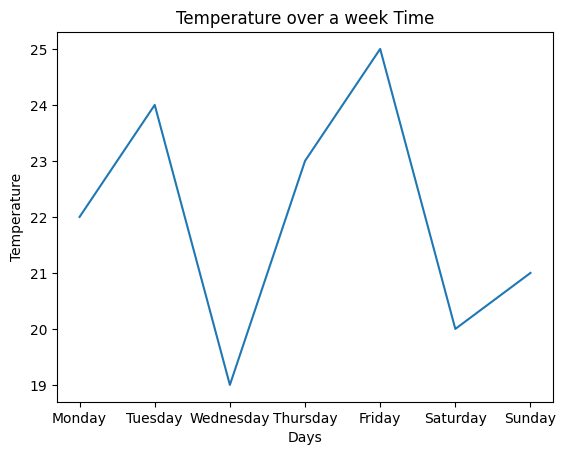

In [37]:
# Plot the data
plt.plot(data['Day'], data['Temperature'])

plt.title("Temperature over a week Time")
plt.xlabel("Days")
plt.ylabel("Temperature")
# Show the plot
plt.show()

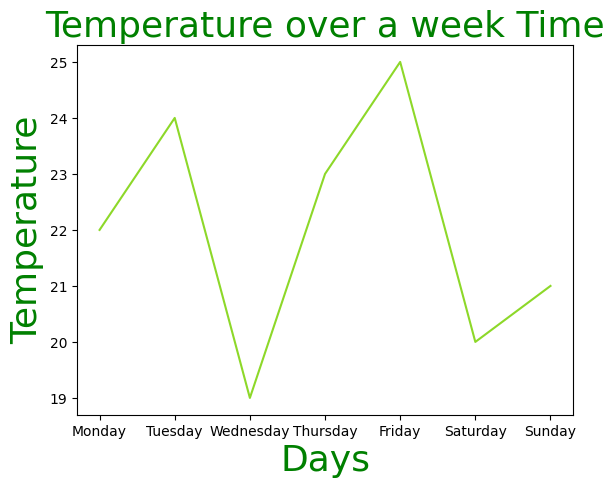

In [42]:
# Plot the data
plt.plot(data['Day'], data['Temperature'], color="#8dd829")

font = {'family': 'Tahoma',
        'color':  'g',
        'weight': 'normal',
        'size': 26,
        }

plt.title("Temperature over a week Time", fontdict=font)
plt.xlabel("Days", fontdict= font)
plt.ylabel("Temperature", fontdict= font)
# Show the plot
plt.show()

In [43]:

# Create a dummy dataset
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
city1_temperature = [22, 24, 19, 23, 25, 20, 21]
city2_temperature = [25, 26, 22, 27, 28, 24, 23]

# Create a DataFrame
data = pd.DataFrame({
    'Day': days,
    'City1_Temperature': city1_temperature,
    'City2_Temperature': city2_temperature
})
display(data)


,Day,City1_Temperature,City2_Temperature
0,Monday,22,25
1,Tuesday,24,26
2,Wednesday,19,22
3,Thursday,23,27
4,Friday,25,28
5,Saturday,20,24
6,Sunday,21,23


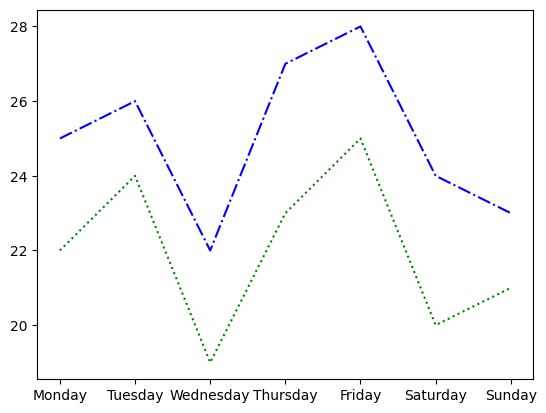

In [51]:
plt.plot(data['Day'], data['City1_Temperature'], color="g", linestyle = "dotted")

plt.plot(data['Day'], data['City2_Temperature'], color = "b", linestyle="dashdot")

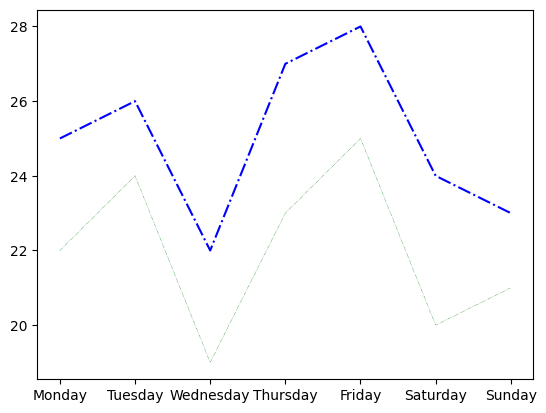

In [63]:
plt.plot(data['Day'], data['City1_Temperature'], color="g", linestyle = (0,(3,1,2,1,2)), linewidth = .3)

plt.plot(data['Day'], data['City2_Temperature'], color = "b", linestyle="dashdot")

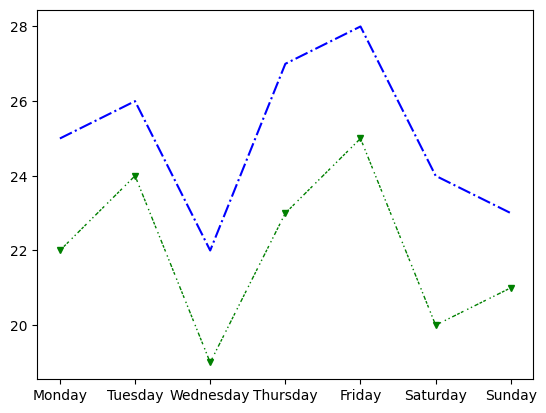

In [72]:
plt.plot(data['Day'], data['City1_Temperature'], color="g", linestyle = (0,(3,1,2,1,2)), linewidth = 1, marker = "v", markersize=4)

plt.plot(data['Day'], data['City2_Temperature'], color = "b", linestyle="dashdot")

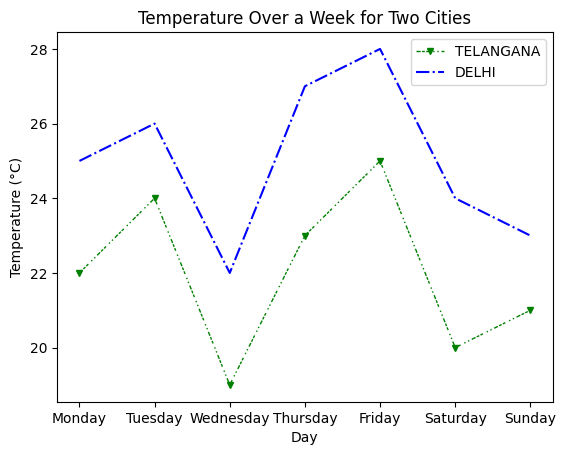

In [85]:
plt.plot(data['Day'], data['City1_Temperature'], color="g", linestyle = (0,(3,1,2,1,2)), linewidth = 1, marker = "v", markersize=4, label= "TELANGANA")

plt.plot(data['Day'], data['City2_Temperature'], color = "b", linestyle="dashdot", label = "DELHI")

# Add titles and labels
plt.title('Temperature Over a Week for Two Cities')
plt.xlabel('Day')
plt.ylabel('Temperature (°C)')

plt.legend()
# Show the plot
plt.show()


In [87]:

# Create a dummy dataset
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',"adsf"]
city1_temperature = [22, 24, 19, 23, 25, 20, 21,6500]
city2_temperature = [25, 26, 22, 27, 28, 24, 23,3500]

# Create a DataFrame
data1 = pd.DataFrame({
    'Day': days,
    'City1_Temperature': city1_temperature,
    'City2_Temperature': city2_temperature
})
print(data1)

         Day  City1_Temperature  City2_Temperature
0     Monday                 22                 25
1    Tuesday                 24                 26
2  Wednesday                 19                 22
3   Thursday                 23                 27
4     Friday                 25                 28
5   Saturday                 20                 24
6     Sunday                 21                 23
7       adsf               6500               3500


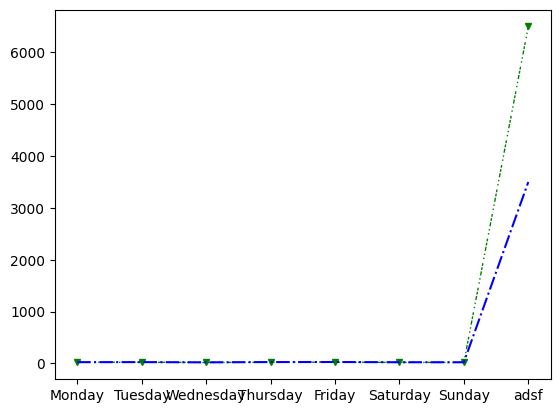

In [89]:
plt.plot(data1['Day'], data1['City1_Temperature'], color="g", linestyle = (0,(3,1,2,1,2)), linewidth = 1, marker = "v", markersize=4)

plt.plot(data1['Day'], data1['City2_Temperature'], color = "b", linestyle="dashdot")

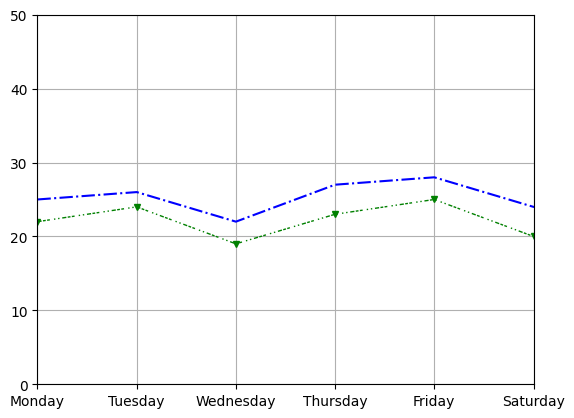

In [95]:
plt.plot(data1['Day'], data1['City1_Temperature'], color="g", linestyle = (0,(3,1,2,1,2)), linewidth = 1, marker = "v", markersize=4)

plt.plot(data1['Day'], data1['City2_Temperature'], color = "b", linestyle="dashdot")

plt.xlim("Monday", "Saturday")
plt.ylim(0,50)
plt.grid()